In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
# sys.path.append(r'E:/0code')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code')
# sys.path.append('/Users/yanbin/Documents/Projects/AI-Middle-Project/')
# sys.path.append('/Users/yanbin/Documents/Projects/mylearn')

# sys.path.append('/home/wyf/0code/AI-Middle-Project/')
# sys.path.append('/home/wyf/0code/mylearn')
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from logger import get_logger
from neural_network import MLPClassifier
from pyml.model_selection import KFold
from pyml.model_selection import ShuffleSplit
from pyml.metrics.classification import precision_score


mylogger = get_logger(__name__)
mylogger.debug('hello world')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[DEBUG] __init__ __init__.py - pylab_setup line 90 - 
backend module://ipykernel.pylab.backend_inline version unknown
 - (2018-10-21 08:35:15)

[DEBUG] <ipython-input-18-13f503ce5e29> <ipython-input-18-13f503ce5e29> - <module> line 25 - 
hello world
 - (2018-10-21 08:35:15)



# 读取数据

In [3]:
train_X_vec2doc_2 = np.load('../data/wyf-train_X-doc2vec-500.npy')
test_X_vec2doc_2 = np.load('../data/wyf-test_X-doc2vec-500.npy')

In [13]:
train_X_vec2doc = np.load('../data/clean/trainX_vec2doc-24000-500.npy')
test_X_vec2doc = np.load('../data/clean/testX_vec2doc-6000-500.npy')

In [14]:
train_X_tfidf = np.load('../data/clean/trainX_tfidf-24000-62761.npy')
test_X_tfidf = np.load('../data/clean/testX_tfidf-6000-62761.npy')

In [15]:
train_X_onehot = np.load('../data/clean/trainX_onehot-24000-62761.npy')
test_X_onehot = np.load('../data/clean/testX_onthot-6000-62761.npy')

In [2]:
train_ori_Y = np.load('../data/clean/trainY_24000.npy')

# 使用vec2doc_2进行交叉验证

## 测试单层

In [4]:
train_X = train_X_vec2doc_2.T
test_X = test_X_vec2doc_2.T
train_Y  = train_ori_Y.reshape((-1,1))
train_X.shape,train_Y.shape,test_X.shape

((500, 24000), (24000, 1), (500, 6000))

In [5]:
train_X = pd.DataFrame(train_X)
test_X = pd.DataFrame(test_X)
train_Y = pd.DataFrame(train_Y)
train_X.shape,train_Y.shape,test_X.shape

((500, 24000), (24000, 1), (500, 6000))

In [7]:
learning_rates = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01]

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
for train_indices, valid_indices in ms.split(train_X_vec2doc_2):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
            hidden_layer_sizes=(4,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.516142887978524
 - (2018-10-21 02:52:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20208333333333334, training score 0.18854166666666666
 - (2018-10-21 02:52:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.503987438140311
 - (2018-10-21 02:52:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.193125, training score 0.19583333333333333
 - (2018-10-21 02:52:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5011161445518196
 - (2018-10-21 02:52:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20020833333333332, training score 0.20260416666666667
 - (2018-10-21 02:52:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.50008940

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.447978218554519
 - (2018-10-21 02:53:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3645833333333333, training score 0.3640625
 - (2018-10-21 02:53:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.4477404721591008
 - (2018-10-21 02:53:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36041666666666666, training score 0.3776041666666667
 - (2018-10-21 02:53:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.4464654432218786
 - (2018-10-21 02:53:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36270833333333335, training score 0.3729166666666667
 - (2018-10-21 02:53:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[310] loss 0.4409

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.203125, training score 0.20625
 - (2018-10-21 02:53:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.5002097029670787
 - (2018-10-21 02:53:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20291666666666666, training score 0.20885416666666667
 - (2018-10-21 02:53:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.5005188183100385
 - (2018-10-21 02:53:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20208333333333334, training score 0.2125
 - (2018-10-21 02:53:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.4996046102487745
 - (2018-10-21 02:53:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20604166666666668, trai

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.46895556078723183
 - (2018-10-21 02:54:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32229166666666664, training score 0.3296875
 - (2018-10-21 02:54:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.4634442359720934
 - (2018-10-21 02:54:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32645833333333335, training score 0.35208333333333336
 - (2018-10-21 02:54:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.46428741732539813
 - (2018-10-21 02:54:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33166666666666667, training score 0.3572916666666667
 - (2018-10-21 02:54:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] loss 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.500512092416955
 - (2018-10-21 02:54:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20145833333333332, training score 0.2125
 - (2018-10-21 02:54:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.5008325997527818
 - (2018-10-21 02:54:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.200625, training score 0.20625
 - (2018-10-21 02:54:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.5008809425812942
 - (2018-10-21 02:54:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20083333333333334, training score 0.20104166666666667
 - (2018-10-21 02:54:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.5013110506650919
 - (2018-1

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.5002462484164495
 - (2018-10-21 02:55:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.225625, training score 0.21770833333333334
 - (2018-10-21 02:55:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.4984420332270932
 - (2018-10-21 02:55:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22645833333333334, training score 0.23541666666666666
 - (2018-10-21 02:55:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.4988187669968024
 - (2018-10-21 02:55:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22895833333333335, training score 0.24166666666666667
 - (2018-10-21 02:55:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[420] loss 0.5

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.198125, training score 0.19791666666666666
 - (2018-10-21 02:55:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.5026386199915642
 - (2018-10-21 02:55:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.198125, training score 0.1921875
 - (2018-10-21 02:55:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.5026526290981475
 - (2018-10-21 02:55:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.198125, training score 0.19010416666666666
 - (2018-10-21 02:55:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.5022007586867298
 - (2018-10-21 02:55:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19875, training score 0.196

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[440] loss 0.5008531579476995
 - (2018-10-21 02:56:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20395833333333332, training score 0.20677083333333332
 - (2018-10-21 02:56:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[450] loss 0.5006189401841471
 - (2018-10-21 02:56:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20416666666666666, training score 0.19270833333333334
 - (2018-10-21 02:56:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[460] loss 0.500319099331109
 - (2018-10-21 02:56:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.203125, training score 0.20416666666666666
 - (2018-10-21 02:56:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[470] loss 0.50

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19229166666666667, training score 0.190625
 - (2018-10-21 02:56:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.5019161532764389
 - (2018-10-21 02:56:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.194375, training score 0.2078125
 - (2018-10-21 02:56:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.5042801386475975
 - (2018-10-21 02:56:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19520833333333334, training score 0.17708333333333334
 - (2018-10-21 02:56:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.5042833225996299
 - (2018-10-21 02:56:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.195, training sc

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.5016908502953793
 - (2018-10-21 02:57:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19833333333333333, training score 0.19010416666666666
 - (2018-10-21 02:57:24)

0.19770833333333335
[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.516142887978524
 - (2018-10-21 02:57:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20375, training score 0.18958333333333333
 - (2018-10-21 02:57:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5149830879741594
 - (2018-10-21 02:57:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20395833333333332, training score 0.19270833333333334
 - (2018-10-21 02:57:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.5051213249097616
 - (2018-10-21 02:57:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.193125, training score 0.19114583333333332
 - (2018-10-21 02:57:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.5033693160253688
 - (2018-10-21 02:57:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19208333333333333, training score 0.21822916666666667
 - (2018-10-21 02:57:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.5049819352551427
 - (2018-10-21 02:57:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19208333333333333, training score 0.20364583333333333
 - (2018-10-21 02:57:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.5

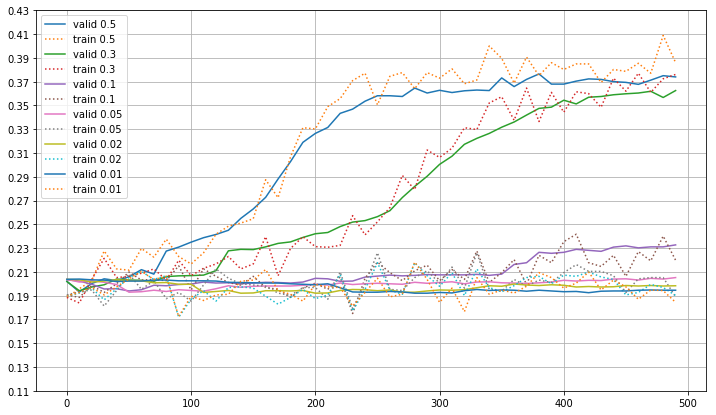

In [19]:
learning_rates = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01]
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 单层-更多的隐藏层节点

In [11]:
learning_rate = 0.3
hidden_sizes = range(2, 41, 5)
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_2 = []
for train_indices, valid_indices in ms.split(train_X_vec2doc_2):
    for hidden_size in hidden_sizes:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
            hidden_layer_sizes=(hidden_size,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=1000, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_2.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5228440704146802
 - (2018-10-21 03:41:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19875, training score 0.2109375
 - (2018-10-21 03:41:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5030228915570905
 - (2018-10-21 03:41:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2, training score 0.21927083333333333
 - (2018-10-21 03:41:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5021408500465218
 - (2018-10-21 03:41:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19979166666666667, training score 0.21197916666666666
 - (2018-10-21 03:41:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.500951492229059
 - (2018-10-21 03

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.28375, training score 0.3125
 - (2018-10-21 03:41:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.48328851827887737
 - (2018-10-21 03:41:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.29104166666666664, training score 0.3
 - (2018-10-21 03:41:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.47955723593684035
 - (2018-10-21 03:41:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2916666666666667, training score 0.30104166666666665
 - (2018-10-21 03:41:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.47104292135915177
 - (2018-10-21 03:41:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2991666666666667, train

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[550] loss 0.44128632159833675
 - (2018-10-21 03:42:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3572916666666667, training score 0.3734375
 - (2018-10-21 03:42:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[560] loss 0.4483458498312601
 - (2018-10-21 03:42:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36125, training score 0.36041666666666666
 - (2018-10-21 03:42:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[570] loss 0.4457690425513358
 - (2018-10-21 03:42:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35583333333333333, training score 0.3578125
 - (2018-10-21 03:42:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[580] loss 0.4480598746932802
 - (2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36020833333333335, training score 0.3697916666666667
 - (2018-10-21 03:42:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[830] loss 0.4380744062391193
 - (2018-10-21 03:42:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36354166666666665, training score 0.3770833333333333
 - (2018-10-21 03:42:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[840] loss 0.4401430875743934
 - (2018-10-21 03:42:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35791666666666666, training score 0.3776041666666667
 - (2018-10-21 03:42:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[850] loss 0.4430223620416341
 - (2018-10-21 03:42:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
valida

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.482432220104041
 - (2018-10-21 03:43:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.27541666666666664, training score 0.30520833333333336
 - (2018-10-21 03:43:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.483357711639559
 - (2018-10-21 03:43:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.28520833333333334, training score 0.2890625
 - (2018-10-21 03:43:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.47613961753491707
 - (2018-10-21 03:43:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2941666666666667, training score 0.3145833333333333
 - (2018-10-21 03:43:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.478

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3566666666666667, training score 0.378125
 - (2018-10-21 03:43:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.44399858435166295
 - (2018-10-21 03:43:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.358125, training score 0.35833333333333334
 - (2018-10-21 03:43:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.44119350368833693
 - (2018-10-21 03:43:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35604166666666665, training score 0.3776041666666667
 - (2018-10-21 03:43:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.443643363958152
 - (2018-10-21 03:43:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3539583

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[650] loss 0.4395927634287137
 - (2018-10-21 03:44:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35833333333333334, training score 0.3885416666666667
 - (2018-10-21 03:44:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[660] loss 0.4445377389081625
 - (2018-10-21 03:44:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3525, training score 0.38125
 - (2018-10-21 03:44:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[670] loss 0.44178403115575
 - (2018-10-21 03:44:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35229166666666667, training score 0.3796875
 - (2018-10-21 03:44:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[680] loss 0.4389849629463804
 - (2018-10

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3645833333333333, training score 0.41041666666666665
 - (2018-10-21 03:44:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[930] loss 0.4371706686959011
 - (2018-10-21 03:44:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.353125, training score 0.3984375
 - (2018-10-21 03:44:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[940] loss 0.43760418763740305
 - (2018-10-21 03:44:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.359375, training score 0.40520833333333334
 - (2018-10-21 03:44:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[950] loss 0.4381526477508902
 - (2018-10-21 03:44:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3597916666666667

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[200] loss 0.4704863366347547
 - (2018-10-21 03:45:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3102083333333333, training score 0.3385416666666667
 - (2018-10-21 03:45:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 0.4714773809688051
 - (2018-10-21 03:45:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.31895833333333334, training score 0.34010416666666665
 - (2018-10-21 03:45:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.46623646603838664
 - (2018-10-21 03:45:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32479166666666665, training score 0.33125
 - (2018-10-21 03:45:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.460

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35020833333333334, training score 0.3796875
 - (2018-10-21 03:46:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[480] loss 0.43882007537482554
 - (2018-10-21 03:46:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35229166666666667, training score 0.3734375
 - (2018-10-21 03:46:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.44367623475565315
 - (2018-10-21 03:46:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35625, training score 0.36875
 - (2018-10-21 03:46:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[500] loss 0.44417719310933895
 - (2018-10-21 03:46:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35333333333333333, traini

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[750] loss 0.4412199003945509
 - (2018-10-21 03:46:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36333333333333334, training score 0.3984375
 - (2018-10-21 03:46:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[760] loss 0.43591020913122047
 - (2018-10-21 03:46:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35833333333333334, training score 0.40208333333333335
 - (2018-10-21 03:46:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[770] loss 0.4354888241806784
 - (2018-10-21 03:46:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3575, training score 0.4005208333333333
 - (2018-10-21 03:46:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[780] loss 0.4328634951038

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.225625, training score 0.23333333333333334
 - (2018-10-21 03:47:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5004589297179424
 - (2018-10-21 03:47:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.23479166666666668, training score 0.24739583333333334
 - (2018-10-21 03:47:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.49752542068802114
 - (2018-10-21 03:47:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.24583333333333332, training score 0.253125
 - (2018-10-21 03:47:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.49324818949074417
 - (2018-10-21 03:47:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2547916

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.355625, training score 0.3770833333333333
 - (2018-10-21 03:48:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[310] loss 0.44174358231069927
 - (2018-10-21 03:48:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35354166666666664, training score 0.3880208333333333
 - (2018-10-21 03:48:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[320] loss 0.44069501772503156
 - (2018-10-21 03:48:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.355, training score 0.3890625
 - (2018-10-21 03:48:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.4494030876660514
 - (2018-10-21 03:48:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.356875, training sc

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[580] loss 0.43250339092668105
 - (2018-10-21 03:48:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35583333333333333, training score 0.4192708333333333
 - (2018-10-21 03:48:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[590] loss 0.4276853304437945
 - (2018-10-21 03:48:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35541666666666666, training score 0.43385416666666665
 - (2018-10-21 03:48:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[600] loss 0.43658643648806067
 - (2018-10-21 03:48:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3589583333333333, training score 0.3958333333333333
 - (2018-10-21 03:48:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[610

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3564583333333333, training score 0.39895833333333336
 - (2018-10-21 03:49:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[860] loss 0.4255323498126497
 - (2018-10-21 03:49:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35770833333333335, training score 0.415625
 - (2018-10-21 03:49:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[870] loss 0.4245104207663958
 - (2018-10-21 03:49:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35854166666666665, training score 0.4510416666666667
 - (2018-10-21 03:49:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[880] loss 0.4231764348202666
 - (2018-10-21 03:49:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.46951673165937297
 - (2018-10-21 03:50:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.29875, training score 0.34427083333333336
 - (2018-10-21 03:50:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.47012120114226974
 - (2018-10-21 03:50:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30395833333333333, training score 0.3333333333333333
 - (2018-10-21 03:50:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.4703615395489864
 - (2018-10-21 03:50:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.31145833333333334, training score 0.3234375
 - (2018-10-21 03:50:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.45894121563

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.4390664513706224
 - (2018-10-21 03:50:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35333333333333333, training score 0.4005208333333333
 - (2018-10-21 03:50:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[420] loss 0.4345782521513449
 - (2018-10-21 03:50:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36, training score 0.3958333333333333
 - (2018-10-21 03:50:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[430] loss 0.43973136718911987
 - (2018-10-21 03:50:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.356875, training score 0.3953125
 - (2018-10-21 03:50:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[440] loss 0.43127697919576063
 - (2018-

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3595833333333333, training score 0.43385416666666665
 - (2018-10-21 03:51:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[690] loss 0.42764253923539836
 - (2018-10-21 03:51:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3570833333333333, training score 0.43020833333333336
 - (2018-10-21 03:51:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[700] loss 0.4308921699978498
 - (2018-10-21 03:51:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3595833333333333, training score 0.42864583333333334
 - (2018-10-21 03:51:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[710] loss 0.43245218058226353
 - (2018-10-21 03:51:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
vali

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[960] loss 0.4260099299192477
 - (2018-10-21 03:52:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36020833333333335, training score 0.4296875
 - (2018-10-21 03:52:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[970] loss 0.4210504975017873
 - (2018-10-21 03:52:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3570833333333333, training score 0.44479166666666664
 - (2018-10-21 03:52:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[980] loss 0.4172444040812809
 - (2018-10-21 03:52:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3564583333333333, training score 0.46145833333333336
 - (2018-10-21 03:52:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[990] loss 0.41

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3383333333333333, training score 0.35833333333333334
 - (2018-10-21 03:53:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.4512556936786006
 - (2018-10-21 03:53:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33770833333333333, training score 0.35572916666666665
 - (2018-10-21 03:53:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.44621943113132956
 - (2018-10-21 03:53:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34270833333333334, training score 0.3671875
 - (2018-10-21 03:53:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.44662512408023325
 - (2018-10-21 03:53:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation s

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35020833333333334, training score 0.39375
 - (2018-10-21 03:53:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[520] loss 0.4357154416225381
 - (2018-10-21 03:53:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34729166666666667, training score 0.396875
 - (2018-10-21 03:53:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[530] loss 0.4273284069833459
 - (2018-10-21 03:53:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3516666666666667, training score 0.42083333333333334
 - (2018-10-21 03:54:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[540] loss 0.4334608595361495
 - (2018-10-21 03:54:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.350625, 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[790] loss 0.419046892216401
 - (2018-10-21 03:54:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.351875, training score 0.4515625
 - (2018-10-21 03:54:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[800] loss 0.42597378112120643
 - (2018-10-21 03:54:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.354375, training score 0.41875
 - (2018-10-21 03:54:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[810] loss 0.41337587508385876
 - (2018-10-21 03:54:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35125, training score 0.4609375
 - (2018-10-21 03:54:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[820] loss 0.4241025672304727
 - (2018-10-21 03:54:50)

[INFO] multi

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.49029276128694116
 - (2018-10-21 03:55:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.26125, training score 0.2557291666666667
 - (2018-10-21 03:55:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.48871756351939094
 - (2018-10-21 03:55:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.26666666666666666, training score 0.2640625
 - (2018-10-21 03:55:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[90] loss 0.4878747916498739
 - (2018-10-21 03:55:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.27229166666666665, training score 0.284375
 - (2018-10-21 03:55:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.47972692909018483
 - (201

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.354375, training score 0.40625
 - (2018-10-21 03:56:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.43919421040132184
 - (2018-10-21 03:56:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3570833333333333, training score 0.4192708333333333
 - (2018-10-21 03:56:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] loss 0.4309974879816423
 - (2018-10-21 03:56:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3589583333333333, training score 0.41302083333333334
 - (2018-10-21 03:56:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[370] loss 0.4363250619406838
 - (2018-10-21 03:56:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.359375, t

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3589583333333333, training score 0.4203125
 - (2018-10-21 03:57:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[630] loss 0.4259451285324177
 - (2018-10-21 03:57:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3566666666666667, training score 0.44375
 - (2018-10-21 03:57:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[640] loss 0.4265259202523551
 - (2018-10-21 03:57:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3614583333333333, training score 0.4239583333333333
 - (2018-10-21 03:57:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[650] loss 0.4317911010529614
 - (2018-10-21 03:57:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3570833333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[900] loss 0.41848399931726127
 - (2018-10-21 03:58:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35854166666666665, training score 0.4515625
 - (2018-10-21 03:58:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[910] loss 0.41824813609498934
 - (2018-10-21 03:58:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35333333333333333, training score 0.45729166666666665
 - (2018-10-21 03:58:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[920] loss 0.42208192600103656
 - (2018-10-21 03:58:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3475, training score 0.44583333333333336
 - (2018-10-21 03:58:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[930] loss 0.4115298896

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.46364116273562134
 - (2018-10-21 03:59:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3254166666666667, training score 0.3458333333333333
 - (2018-10-21 03:59:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.4578122645285558
 - (2018-10-21 03:59:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32916666666666666, training score 0.35885416666666664
 - (2018-10-21 03:59:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[200] loss 0.4569674905370891
 - (2018-10-21 03:59:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.333125, training score 0.36614583333333334
 - (2018-10-21 03:59:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 0.45

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[460] loss 0.4332773975211624
 - (2018-10-21 03:59:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.359375, training score 0.4317708333333333
 - (2018-10-21 04:00:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[470] loss 0.43064446367443815
 - (2018-10-21 04:00:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3589583333333333, training score 0.41875
 - (2018-10-21 04:00:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[480] loss 0.4297182510746173
 - (2018-10-21 04:00:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3616666666666667, training score 0.42083333333333334
 - (2018-10-21 04:00:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.438507623817154

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3622916666666667, training score 0.45
 - (2018-10-21 04:00:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[740] loss 0.41108701853217816
 - (2018-10-21 04:00:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36395833333333333, training score 0.47604166666666664
 - (2018-10-21 04:00:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[750] loss 0.42465191594327395
 - (2018-10-21 04:00:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3625, training score 0.44427083333333334
 - (2018-10-21 04:00:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[760] loss 0.41796463965081104
 - (2018-10-21 04:00:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3583333333

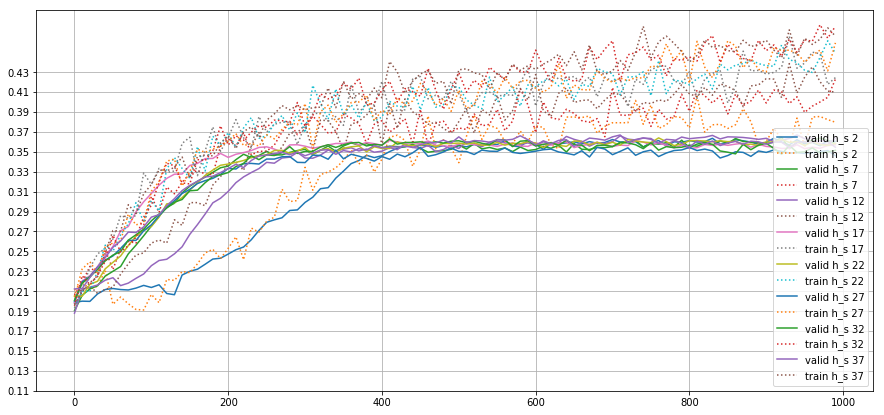

In [14]:
hidden_sizes = range(2, 41, 5)
plt.figure(figsize=(15,7)) 
for i,model in enumerate(models_2):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid h_s '+ str(hidden_sizes[i]))
    plt.plot(num_iterations, train_scores, ':', label='train h_s '+ str(hidden_sizes[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 测试多层

In [6]:
models_2 = []
learning_rates = [0.7, 0.5, 0.3, 0.1]
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)

for train_indices, valid_indices in ms.split(train_X_vec2doc_2):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 8 -> 4 -> 2（2分类）
            hidden_layer_sizes=(8,4), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_2.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5037441903942365
 - (2018-10-21 03:20:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20458333333333334, training score 0.2140625
 - (2018-10-21 03:20:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5015749976619488
 - (2018-10-21 03:20:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20625, training score 0.1890625
 - (2018-10-21 03:20:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5005622987234928
 - (2018-10-21 03:20:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21229166666666666, training score 0.22395833333333334
 - (2018-10-21 03:20:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.49993455847698876
 - (2018-

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn/metrics/logistic_function.py:32: RuntimeWarning: invalid value encountered in true_divide
  return npexp / s


AssertionError: 

In [23]:
learning_rates = [0.7, 0.5, 0.3, 0.1]
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models_2):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

<Figure size 864x504 with 0 Axes>

## 测试mini-batch

In [15]:
models_3 = []
learning_rate = 0.3
n_splits = 1
mini_batchs = ['auto','not']
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)

for train_indices, valid_indices in ms.split(train_X_vec2doc_2):
    for mini_batch in mini_batchs:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 8 -> 4 -> 2（2分类）
            hidden_layer_sizes=(8,4), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch=mini_batch, # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_3.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5046848153822485
 - (2018-10-21 08:03:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.199375, training score 0.20520833333333333
 - (2018-10-21 08:03:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5018636946658035
 - (2018-10-21 08:03:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.18854166666666666, training score 0.2046875
 - (2018-10-21 08:03:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5014169955612051
 - (2018-10-21 08:03:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20125, training score 0.19635416666666666
 - (2018-10-21 08:03:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5014275089928137
 - (2018-10

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35791666666666666, training score 0.36822916666666666
 - (2018-10-21 08:04:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.4545050254484636
 - (2018-10-21 08:04:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35833333333333334, training score 0.36666666666666664
 - (2018-10-21 08:04:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.45004400350488255
 - (2018-10-21 08:04:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3595833333333333, training score 0.3703125
 - (2018-10-21 08:04:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.44844625079810785
 - (2018-10-21 08:04:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation s

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.5003893269984737
 - (2018-10-21 08:05:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.196875, training score 0.211875
 - (2018-10-21 08:05:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.5002262693187562
 - (2018-10-21 08:05:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.195625, training score 0.21286458333333333
 - (2018-10-21 08:05:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.5000711968163407
 - (2018-10-21 08:05:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19520833333333334, training score 0.21364583333333334
 - (2018-10-21 08:05:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.4999120072519319
 - (2018-1

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.358125, training score 0.3709895833333333
 - (2018-10-21 08:09:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.4462523145390702
 - (2018-10-21 08:09:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35770833333333335, training score 0.37041666666666667
 - (2018-10-21 08:10:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.44544070166653965
 - (2018-10-21 08:10:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.356875, training score 0.37036458333333333
 - (2018-10-21 08:10:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.444720872609393
 - (2018-10-21 08:10:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3570833

In [ ]:
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models_3):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(mini_batchs[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(mini_batchs[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 训练模型跑rank

In [16]:
learning_rate = 0.3
hidden_sizes = range(2, 41, 5)
n_splits = 1
train_models_h = []
for hidden_size in hidden_sizes:
    train_train_X = train_X
    train_train_Y = train_Y
    mlpc = MLPClassifier(verbose=False, 
        # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
        hidden_layer_sizes=(hidden_size,), 
        activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
        max_iter=500, # 迭代次数
        learning_rate_init=learning_rate, 
        warm_start=True,  # True就好了
        mini_batch='auto', # 保持auto
        step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
        load_from_file=False, # 读文件恢复模型吗
        dump_file=False # 要不要把模型写入文件？
#         validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
    )
    mlpc.fit(train_train_X, train_train_Y)
    train_models_h.append(mlpc)
    print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5235567311276648
 - (2018-10-21 08:25:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5067264107694853
 - (2018-10-21 08:25:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5021683748154032
 - (2018-10-21 08:25:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5014510241827798
 - (2018-10-21 08:25:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.5011647543011956
 - (2018-10-21 08:25:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.5006654490052278
 - (2018-10-21 08:25:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.5001212314176438
 - (2018-10-21 08:25:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] los

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.48042685932079876
 - (2018-10-21 08:26:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.4759023919257993
 - (2018-10-21 08:26:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.4685236897086864
 - (2018-10-21 08:26:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.46871537490857257
 - (2018-10-21 08:26:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.4649632869657005
 - (2018-10-21 08:26:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.46153857290283073
 - (2018-10-21 08:26:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.45914757789001776
 - (2018-10-21 08:26:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.45694844724343436
 - (2018-10-21 08:27:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.45552257260108536
 - (2018-10-21 08:27:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.456139675153651
 - (2018-10-21 08:27:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.4524549697729076
 - (2018-10-21 08:27:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.4504024252132326
 - (2018-10-21 08:27:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.4485418145247675
 - (2018-10-21 08:27:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.44707812882983167
 - (2018-10-21 08:27:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 -

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] loss 0.44223760811985374
 - (2018-10-21 08:28:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[370] loss 0.44306440238646305
 - (2018-10-21 08:28:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.4427527686970181
 - (2018-10-21 08:28:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.44060507056644665
 - (2018-10-21 08:28:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.43787862247607584
 - (2018-10-21 08:28:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.4373350039245788
 - (2018-10-21 08:28:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[420] loss 0.4420755156363156
 - (2018-10-21 08:28:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[480] loss 0.4333807777877945
 - (2018-10-21 08:29:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.4330003446357872
 - (2018-10-21 08:29:22)

0.36791666666666667
[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5728606899566654
 - (2018-10-21 08:29:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5105559391034088
 - (2018-10-21 08:29:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5071548843975
 - (2018-10-21 08:29:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5012919752794907
 - (2018-10-21 08:29:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.5010558216292829
 - (2018-10-21 08:29:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train l

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.4833065329120228
 - (2018-10-21 08:30:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.47731443974752824
 - (2018-10-21 08:30:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.4766936360509554
 - (2018-10-21 08:30:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.4758322728545278
 - (2018-10-21 08:30:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.47174716182852305
 - (2018-10-21 08:30:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.4679999634812045
 - (2018-10-21 08:30:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.463368820304068
 - (2018-10-21 08:30:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.4498477775298577
 - (2018-10-21 08:32:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.45052013860815787
 - (2018-10-21 08:32:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.44887934680668357
 - (2018-10-21 08:32:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.4455523967103509
 - (2018-10-21 08:32:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.4514854770633273
 - (2018-10-21 08:32:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.44900721886085715
 - (2018-10-21 08:32:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.445820120205305
 - (2018-10-21 08:32:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 -

In [19]:
for i,model in enumerate(train_models_h):
    p = model.predict(test_X)
    result = pd.DataFrame(i[0] for i in p)
    result.to_csv('./results/'+'doc2vec-nn-'+str(hidden_sizes[i])+ str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")) + ".csv", index=0, header=None, index_label=None)

In [20]:
learning_rates = [0.25, 0.26, 0.27, 0.28, 0.29, 0.30]
hidden_size = 10
train_models_lr = []
for learning_rate in learning_rates:
    train_train_X = train_X
    train_train_Y = train_Y
    mlpc = MLPClassifier(verbose=False, 
        # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
        hidden_layer_sizes=(hidden_size,), 
        activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
        max_iter=550, # 迭代次数
        learning_rate_init=learning_rate, 
        warm_start=True,  # True就好了
        mini_batch='auto', # 保持auto
        step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
        load_from_file=False, # 读文件恢复模型吗
        dump_file=False # 要不要把模型写入文件？
#         validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
    )
    mlpc.fit(train_train_X, train_train_Y)
    train_models_lr.append(mlpc)
    print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5070861245889566
 - (2018-10-21 08:54:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5025679195247889
 - (2018-10-21 08:54:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.49873164166896106
 - (2018-10-21 08:54:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.4988385462081999
 - (2018-10-21 08:54:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.49506241685669444
 - (2018-10-21 08:54:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.4912695268637012
 - (2018-10-21 08:54:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.4945689139508773
 - (2018-10-21 08:54:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] l

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.4877226426103952
 - (2018-10-21 08:55:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.4837154141655476
 - (2018-10-21 08:55:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[90] loss 0.48326708806181745
 - (2018-10-21 08:55:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.4803347426397325
 - (2018-10-21 08:55:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.47509661774800604
 - (2018-10-21 08:55:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.4709560326538006
 - (2018-10-21 08:55:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.47084324555181845
 - (2018-10-21 08:55:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 


[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.46693541534198724
 - (2018-10-21 08:56:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.46077152716820385
 - (2018-10-21 08:56:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.46102129207376
 - (2018-10-21 08:56:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.4526119562055023
 - (2018-10-21 08:56:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.4539269186861147
 - (2018-10-21 08:56:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.4537599274506526
 - (2018-10-21 08:56:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[200] loss 0.45498707663832555
 - (2018-10-21 08:56:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 0.4496727461856933
 - (2018-10-21 08:56:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.44855261020155335
 - (2018-10-21 08:57:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.4514399288356711
 - (2018-10-21 08:57:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.4498403550583688
 - (2018-10-21 08:57:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.448686114676649
 - (2018-10-21 08:57:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.4423188901223391
 - (2018-10-21 08:57:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.44919758336615595
 - (2018-10-21 08:57:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.44165264530082726
 - (2018-10-21 08:57:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.4466694154849399
 - (2018-10-21 08:57:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.44641056789483885
 - (2018-10-21 08:57:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[310] loss 0.44272066923076275
 - (2018-10-21 08:57:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[320] loss 0.448487680305596
 - (2018-10-21 08:57:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.4460274014138429
 - (2018-10-21 08:57:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.44482830012630115
 - (2018-10-21 08:57:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.4433897328057116
 - (2018-10-21 08:58:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] loss 0.4457039399511267
 - (2018-10-21 08:58:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[370] loss 0.4395255763356417
 - (2018-10-21 08:58:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.4406165064021887
 - (2018-10-21 08:58:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.44162656276116063
 - (2018-10-21 08:58:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.44207751339163326
 - (2018-10-21 08:58:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.4450638843288848
 - (2018-10-21 08:58:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 -

In [21]:
for i,model in enumerate(train_models_lr):
    p = model.predict(test_X)
    result = pd.DataFrame(i[0] for i in p)
    result.to_csv('./results/'+'doc2vec-nn-'+str(learning_rates[i])+'-'+ str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")) + ".csv", index=0, header=None, index_label=None)